In [2]:
!which python

/Users/apabook/Desktop/challenge_02/venv/bin/python


In [3]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
from matplotlib import pyplot as plt

## Global EDA

In [4]:
df = pd.read_csv("./../data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8148 non-null   int64 
 1   text    8148 non-null   object
 2   id      8148 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.1+ KB


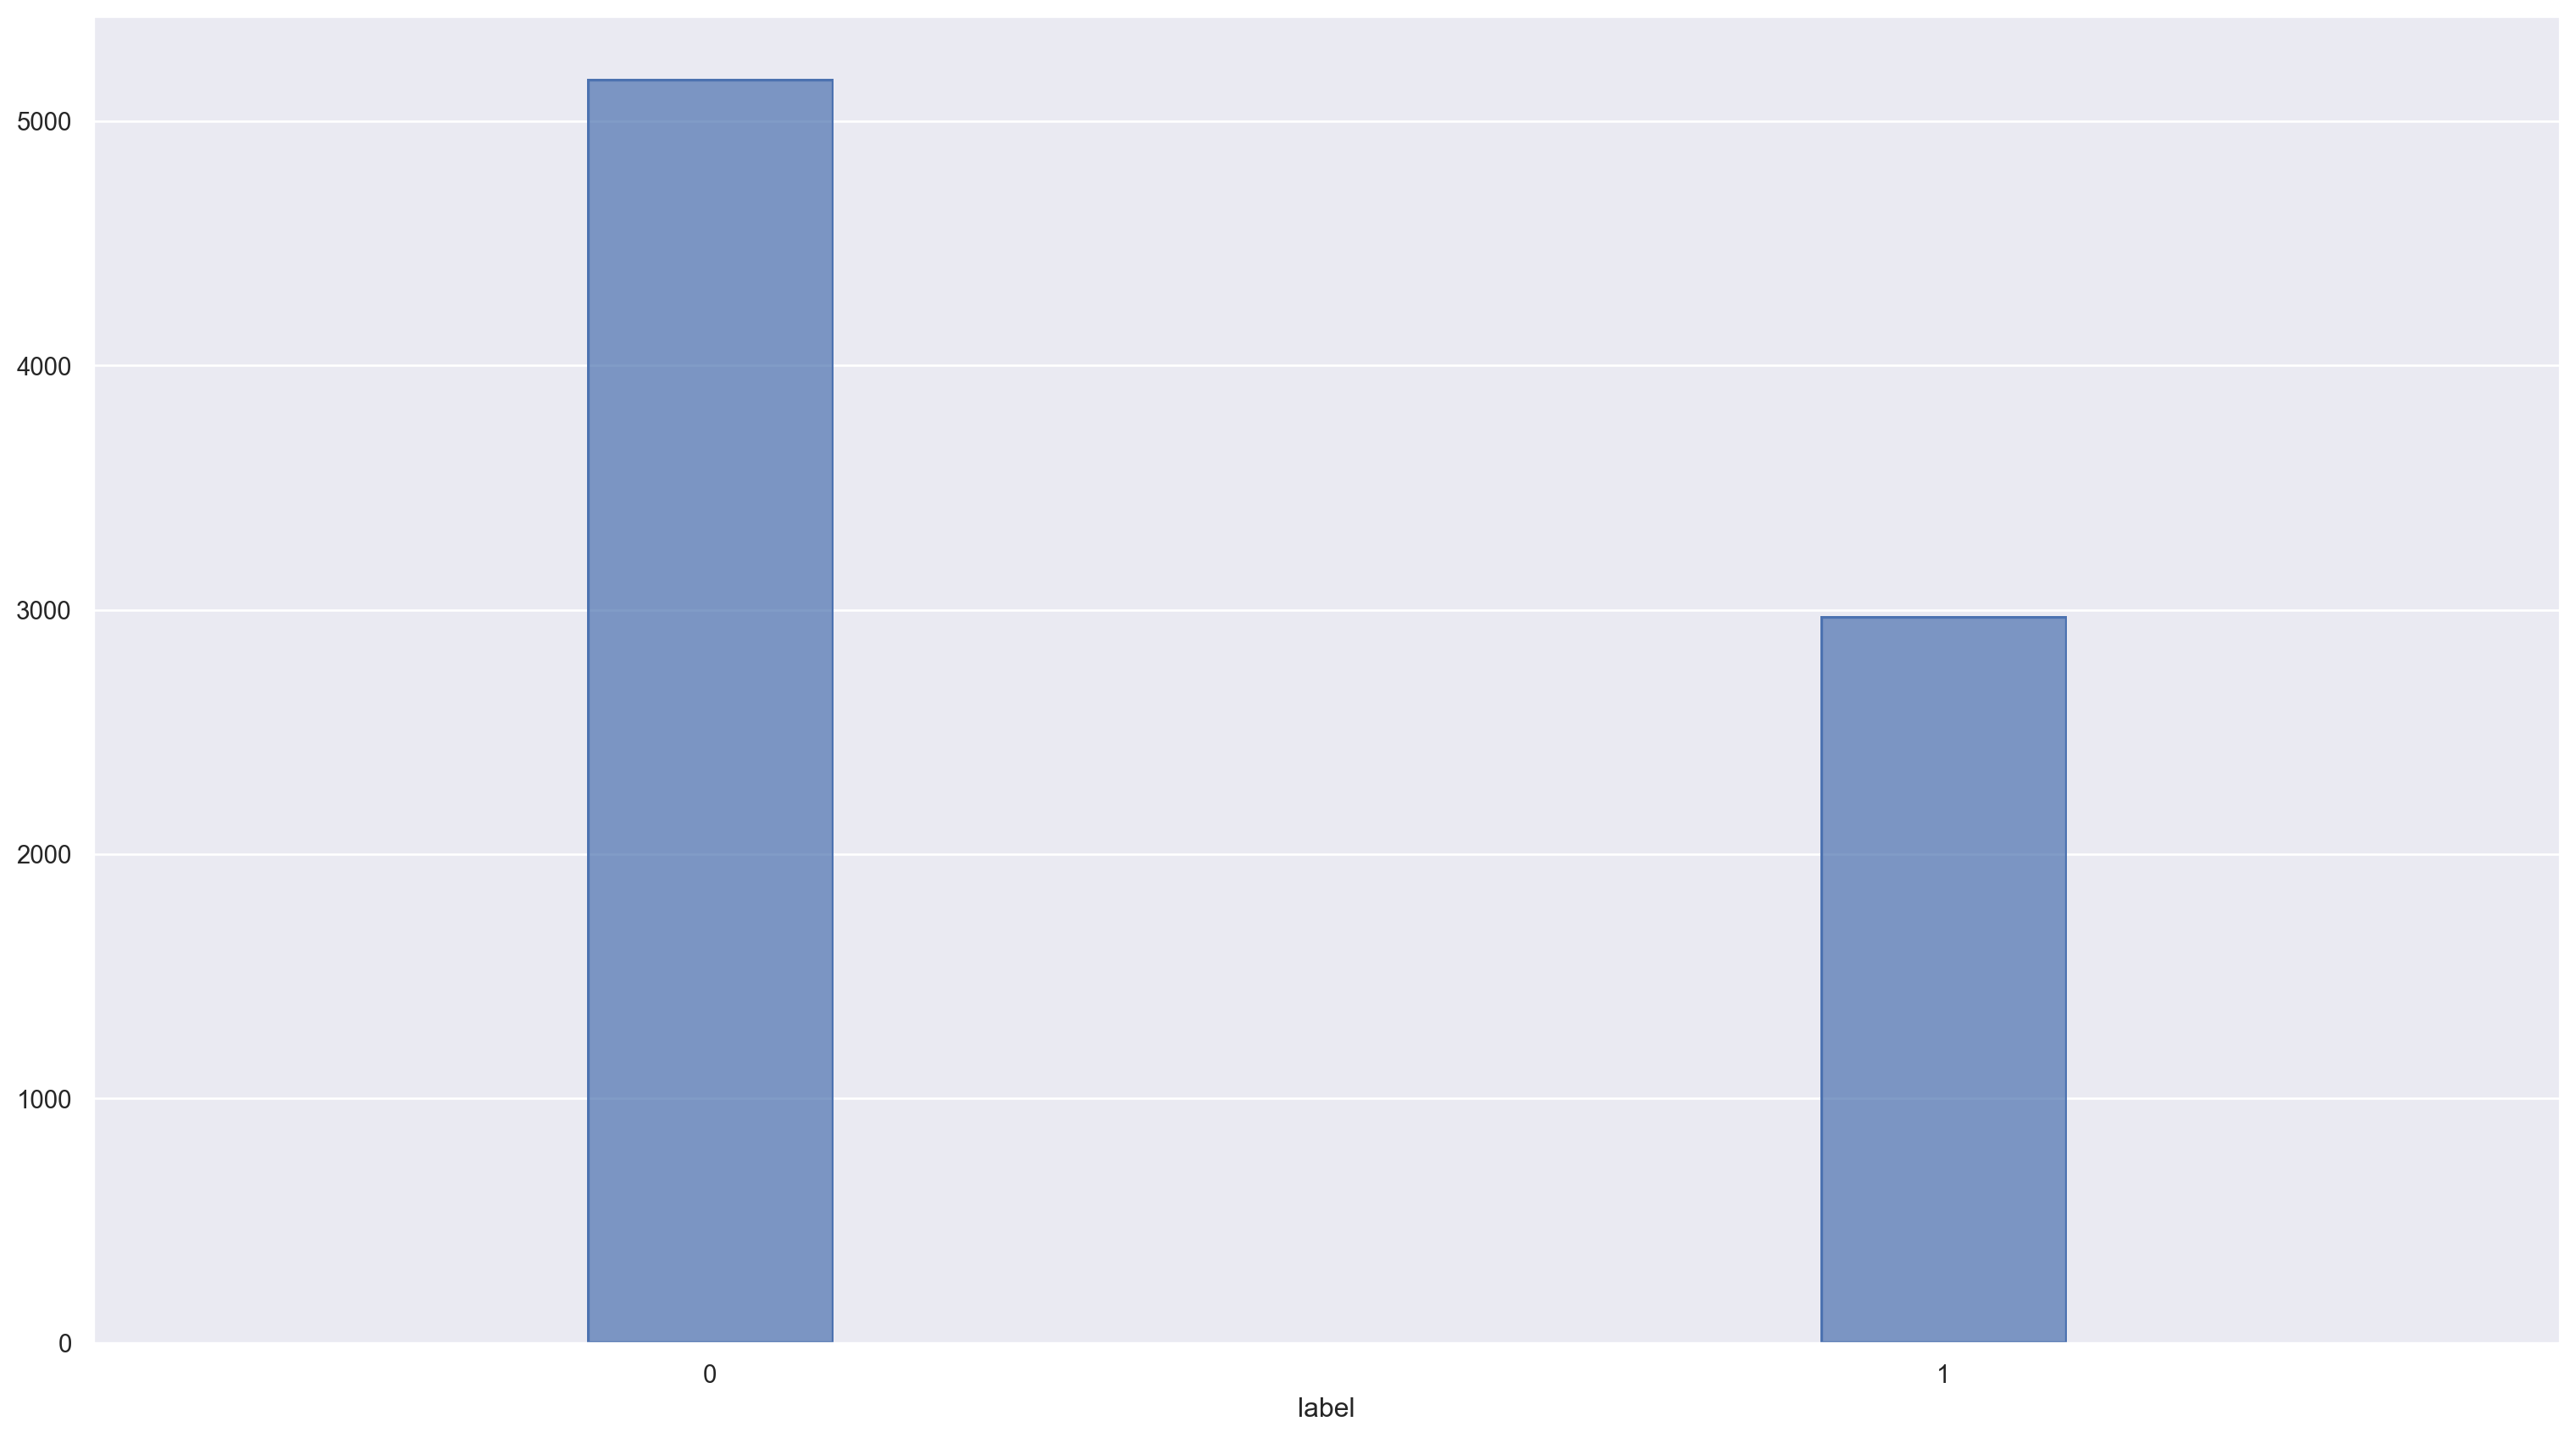

In [5]:
so.Plot(df, x="label")\
    .add(so.Bar(width=.2), so.Count())\
    .layout(size=(16, 9))\
    .scale(
        x=so.Nominal()
    )\
    .save("./../plots/balancing.png")

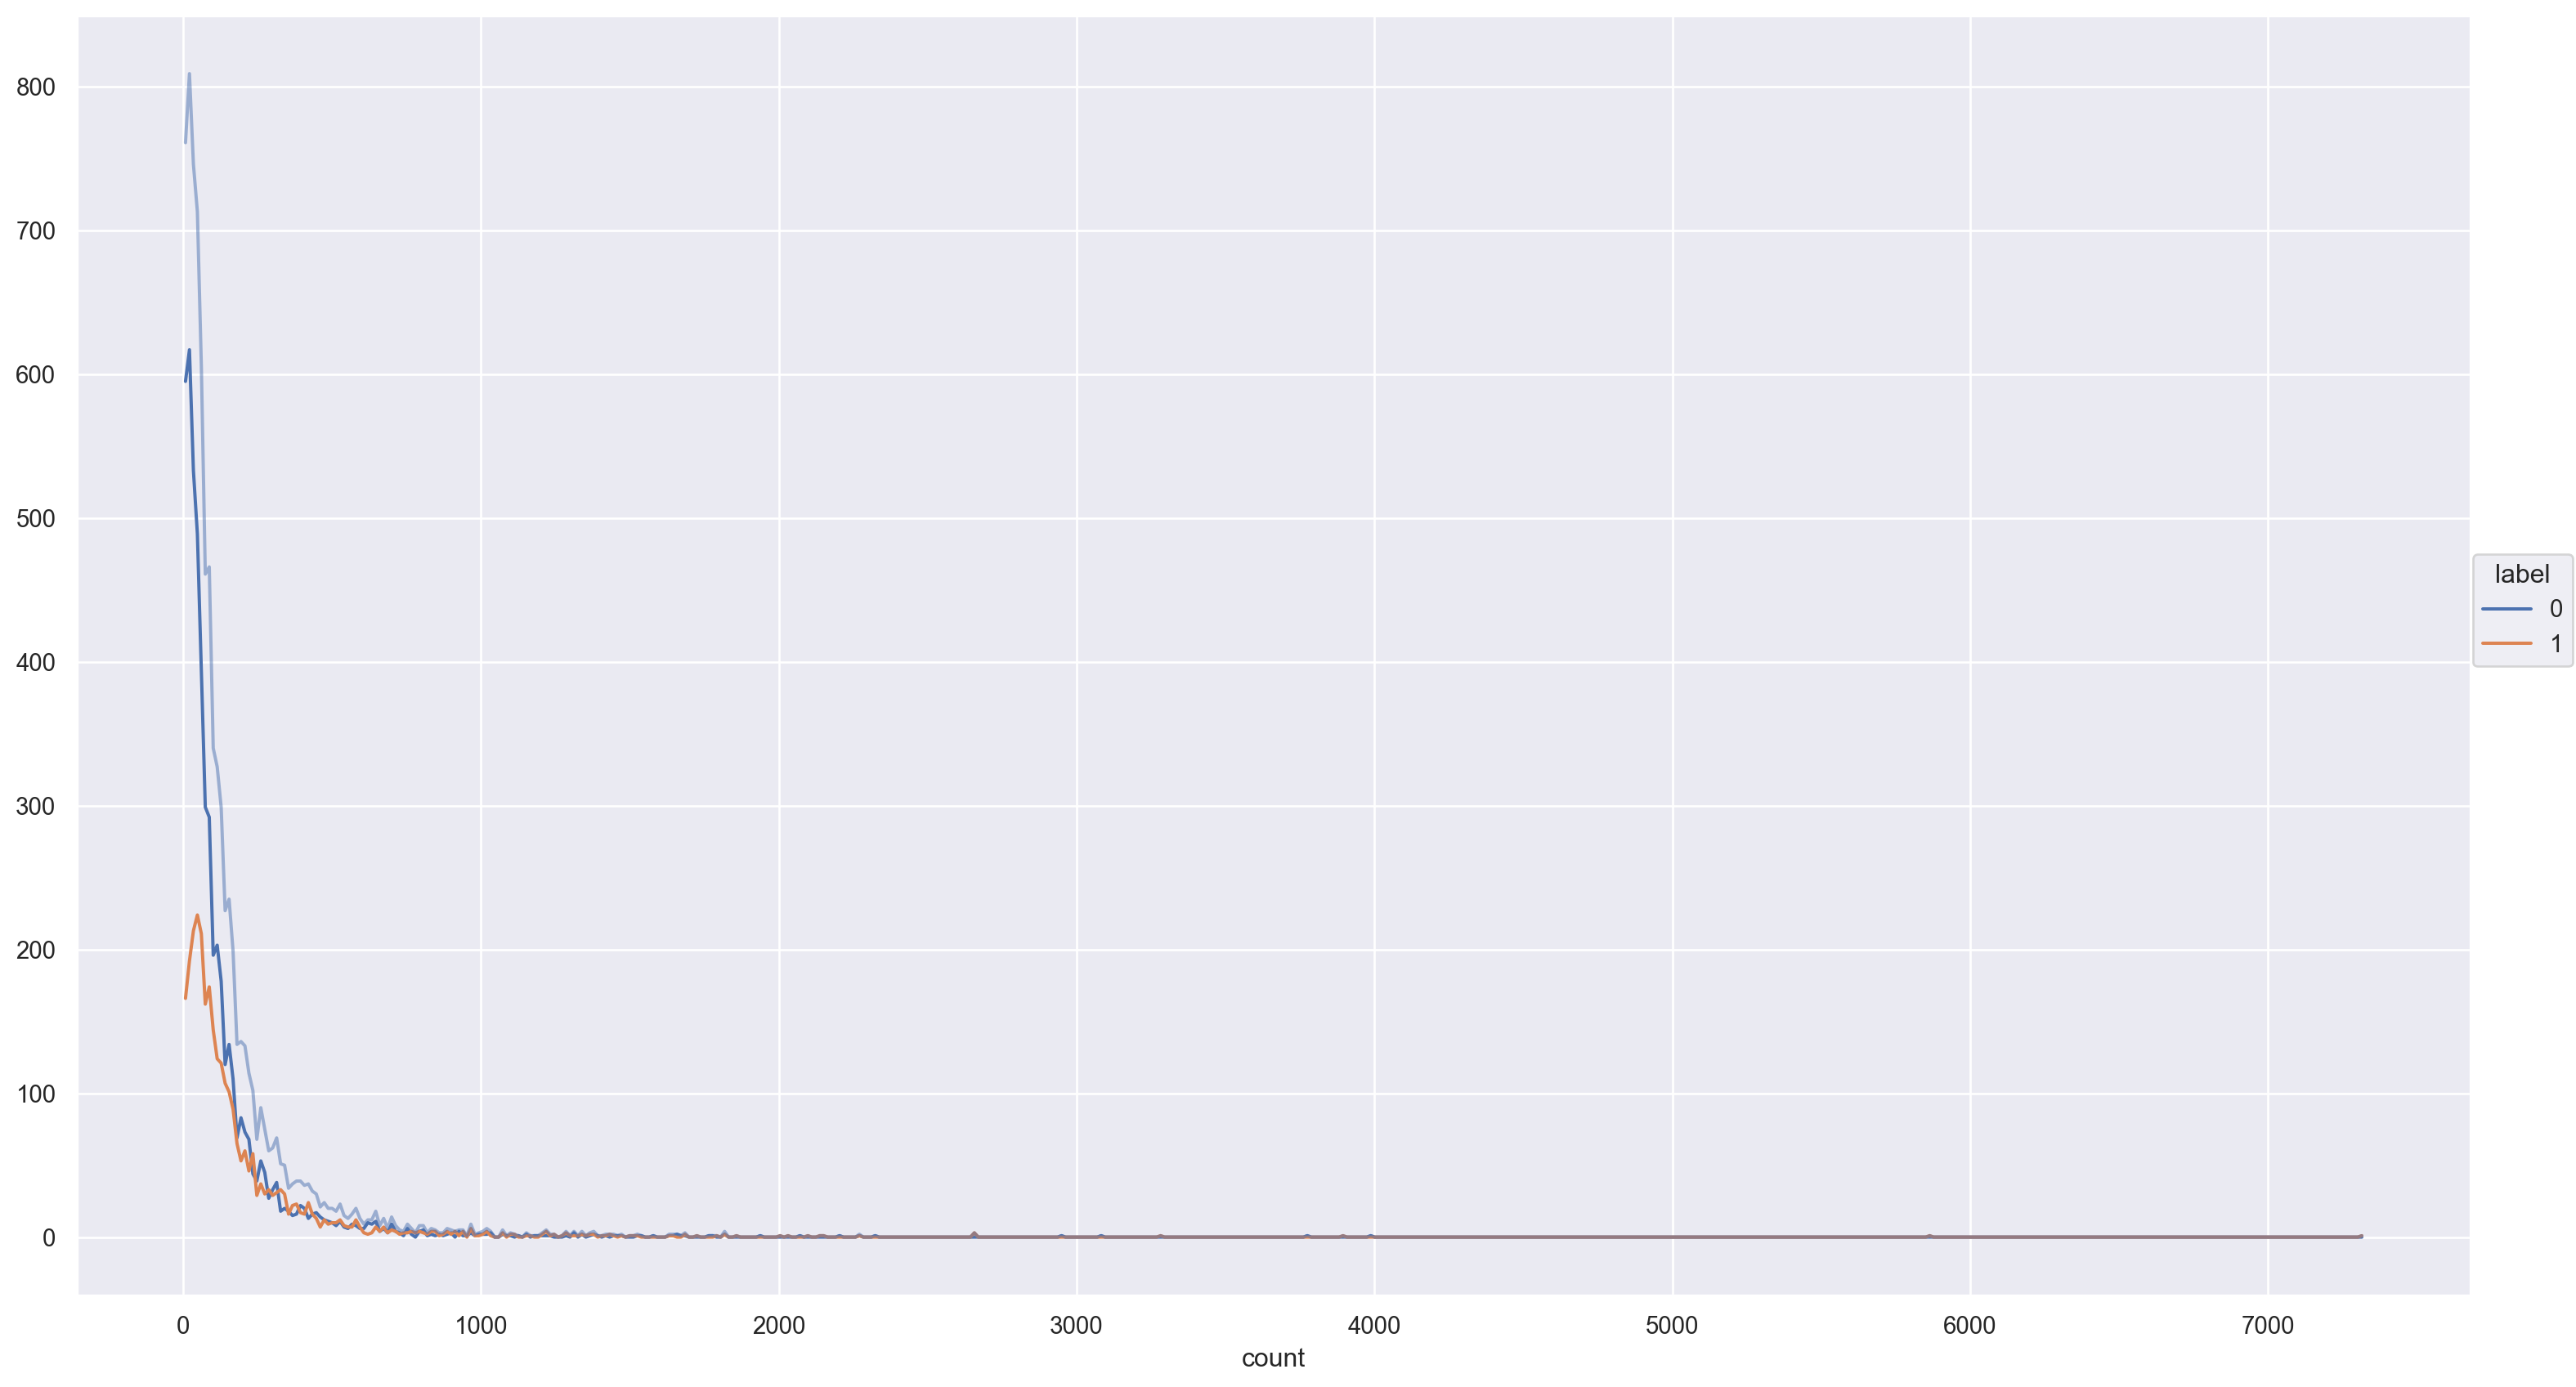

In [6]:
df["count_chars"] = df.text.apply(lambda cell: len(cell))
df["label"].astype("bool") 

df_viz = pd.DataFrame(data={
    "count": df["count_chars"].values, 
    "label": df["label"].values, 
})
df_viz["label"] = df_viz["label"].apply(lambda x: "0" if x == 0 else "1")

so.Plot(df_viz, x="count")\
    .add(so.Line(), so.Hist(), color="label")\
    .add(so.Line(alpha=.5), so.Hist())\
    .layout(size=(16, 9))\
    .save("./../plots/frequency_length.png")

## Lengths and counts

In [7]:
from nltk.tokenize import sent_tokenize

def count_emojis(cell):
    emoji_count = 0
    for char in cell:
        if (
            0x1F300 <= ord(char) <= 0x1F64F
            or 0x2700 <= ord(char) <= 0x27BF
            or 0x1F680 <= ord(char) <= 0x1F6FF
        ):
            emoji_count += 1
    return emoji_count


df["count_chars"] = df.text.apply(lambda cell: len(cell))
df["count_words"] = df.text.apply(lambda cell: len(cell.split()))
df["count_sentences"] = df.text.apply(lambda cell: len(sent_tokenize(cell)))
df["count_emojis"] = df["text"].apply(count_emojis)
df["count_at"] = df["text"].str.contains("@")
df["count_hash"] = df["text"].str.contains("#")

In [8]:
df["count_words_avg"] = df.text.apply(lambda cell: np.mean([len(w) for w in cell.split()], dtype="float"))
df["count_sentences_avg"] = df.text.apply(lambda cell: np.mean([len(s.split()) for s in sent_tokenize(cell)], dtype="float"))

In [9]:
df

,label,text,id,count_chars,count_words,count_sentences,count_emojis,count_at,count_hash,count_words_avg,count_sentences_avg
0,0,"Hi Roy hope you are ok, Trans people are not g...",95e98db99c2,490,83,4,0,False,False,4.915663,20.750000
1,0,But fuckin' hell what even is biology,a87b8708e63,37,7,1,0,False,False,4.428571,7.000000
2,0,Whose the nice looking clergyman?,5b3cb03803f,33,5,1,0,False,False,5.800000,5.000000
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND...",5b0bad2347e,56,11,1,0,False,False,4.181818,11.000000
4,0,to learn,332048bd188,8,2,1,0,False,False,3.500000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
8143,1,Yeah...if we still alive at the time of the ne...,9141edf7189,118,22,3,0,False,False,4.409091,7.333333
8144,0,There is something fundamentally wrong with this,fde30735725,48,7,1,0,False,False,6.000000,7.000000
8145,1,"This always confused me. If homosexuality is ""...",3d3456b6659,204,39,5,0,False,False,4.256410,7.800000
8146,1,disgusting,eace075fe4d,10,1,1,0,False,False,10.000000,1.000000


In [10]:
mask_label_0 = df["label"] == 0
mask_label_1 = df["label"] == 1


print("Media de caracteres por texto: {0:.2f}".format(df["count_chars"].mean()))
print("Media de caracteres por texto - label 0: {0:.2f}".format(df[mask_label_0]["count_chars"].mean()))
print("Media de caracteres por texto - label 1: {0:.2f}".format(df[mask_label_1]["count_chars"].mean()))
print("\n---\n")

print("Media de palabras por texto: {0:.2f}".format(df["count_words"].mean()))
print("Media de palabras por texto - label 0: {0:.2f}".format(df[mask_label_0]["count_words"].mean()))
print("Media de palabras por texto - label 1: {0:.2f}".format(df[mask_label_1]["count_words"].mean()))
print("\n---\n")

print("Media de frases por texto: {0:.2f}".format(df["count_sentences"].mean()))
print("Media de frases por texto - label 0: {0:.2f}".format(df[mask_label_0]["count_sentences"].mean()))
print("Media de frases por texto - label 1: {0:.2f}".format(df[mask_label_1]["count_sentences"].mean()))
print("\n---\n")

print("Media de longitud de palabras por texto: {0:.2f}".format(df["count_words_avg"].mean()))
print("Media de longitud de palabras por texto - label 0: {0:.2f}".format(df[mask_label_0]["count_words_avg"].mean()))
print("Media de longitud de palabras por texto - label 1: {0:.2f}".format(df[mask_label_1]["count_words_avg"].mean()))
print("\n---\n")

print("Media de longitud de frases por texto: {0:.2f}".format(df["count_sentences_avg"].mean()))
print("Media de longitud de frases por texto - label 0: {0:.2f}".format(df[mask_label_0]["count_sentences_avg"].mean()))
print("Media de longitud de frases por texto - label 1: {0:.2f}".format(df[mask_label_1]["count_sentences_avg"].mean()))

Media de caracteres por texto: 154.55
Media de caracteres por texto - label 0: 129.83
Media de caracteres por texto - label 1: 197.52

---

Media de palabras por texto: 27.41
Media de palabras por texto - label 0: 23.02
Media de palabras por texto - label 1: 35.03

---

Media de frases por texto: 2.23
Media de frases por texto - label 0: 2.04
Media de frases por texto - label 1: 2.57

---

Media de longitud de palabras por texto: 5.64
Media de longitud de palabras por texto - label 0: 6.10
Media de longitud de palabras por texto - label 1: 4.85

---

Media de longitud de frases por texto: 11.46
Media de longitud de frases por texto - label 0: 10.27
Media de longitud de frases por texto - label 1: 13.52


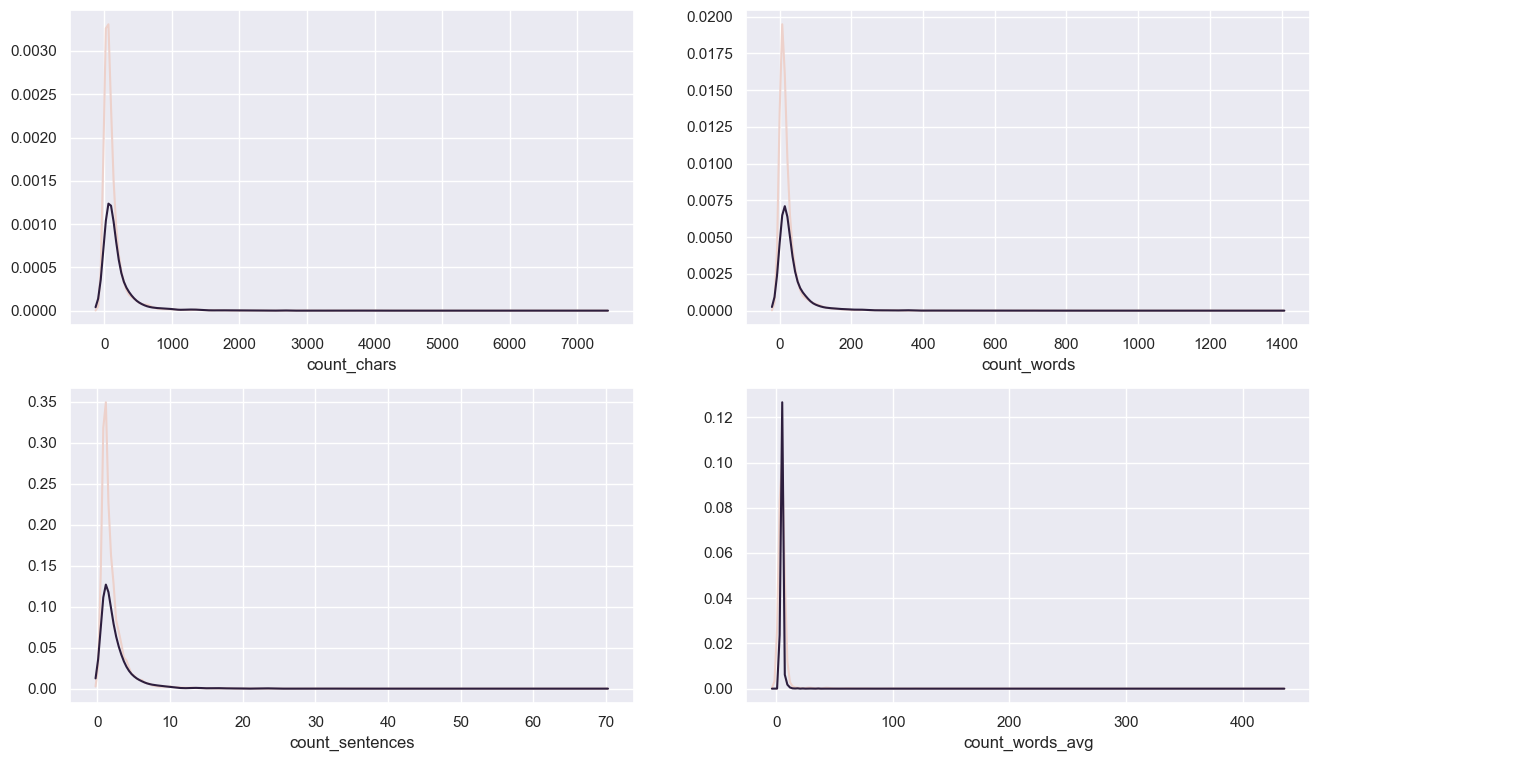

In [11]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

so.Plot(df, color="label")\
    .add(so.Line(), so.KDE(), x="count_chars")\
    .on(axs[0, 0])\
    .plot()

so.Plot(df, color="label")\
    .add(so.Line(), so.KDE(), x="count_words")\
    .on(axs[0, 1])\
    .plot()

so.Plot(df, color="label")\
    .add(so.Line(), so.KDE(), x="count_sentences")\
    .on(axs[1, 0])\
    .plot()

so.Plot(df, color="label")\
    .add(so.Line(), so.KDE(), x="count_words_avg")\
    .on(axs[1, 1])\
    .plot()

fig.savefig("./../plots/02.png")


## Term Frequencies

In [12]:
import re
import string
import unicodedata
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\.\.\.", " ", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = "".join([c for c in text if ord(c) < 128])
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
    text = re.sub(r"\s+", " ", text).strip()
    return text

def remove_stop_words(cell):
    return " ".join([w for w in cell.split() if (w not in stop)])
    

df["text_clean"] = df["text"].map(clean_text)
df["text_clean_w_stopwords"] = df["text_clean"].map(remove_stop_words)

In [13]:
df

,label,text,id,count_chars,count_words,count_sentences,count_emojis,count_at,count_hash,count_words_avg,count_sentences_avg,text_clean,text_clean_w_stopwords
0,0,"Hi Roy hope you are ok, Trans people are not g...",95e98db99c2,490,83,4,0,False,False,4.915663,20.750000,hi roy hope you are ok trans people are not ga...,hi roy hope ok trans people gay also thing tha...
1,0,But fuckin' hell what even is biology,a87b8708e63,37,7,1,0,False,False,4.428571,7.000000,but fuckin hell what even is biology,fuckin hell even biology
2,0,Whose the nice looking clergyman?,5b3cb03803f,33,5,1,0,False,False,5.800000,5.000000,whose the nice looking clergyman,whose nice looking clergyman
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND...",5b0bad2347e,56,11,1,0,False,False,4.181818,11.000000,aids are in your way sin has consequences and ...,aids way sin consequences bad
4,0,to learn,332048bd188,8,2,1,0,False,False,3.500000,2.000000,to learn,learn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,1,Yeah...if we still alive at the time of the ne...,9141edf7189,118,22,3,0,False,False,4.409091,7.333333,yeah if we still alive at the time of the next...,yeah still alive time next election anything h...
8144,0,There is something fundamentally wrong with this,fde30735725,48,7,1,0,False,False,6.000000,7.000000,there is something fundamentally wrong with this,something fundamentally wrong
8145,1,"This always confused me. If homosexuality is ""...",3d3456b6659,204,39,5,0,False,False,4.256410,7.800000,this always confused me if homosexuality is no...,always confused homosexuality big deal isnt pr...
8146,1,disgusting,eace075fe4d,10,1,1,0,False,False,10.000000,1.000000,disgusting,disgusting


In [21]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))
corpus = [word for i in df["text_clean_w_stopwords"].str.split().values.tolist() for word in i if (word not in stop)]
corpus_label_0 = [word for i in df[df["label"] == 0]["text_clean_w_stopwords"].str.split().values.tolist() for word in i if (word not in stop)]
corpus_label_1 = [word for i in df[df["label"] == 1]["text_clean_w_stopwords"].str.split().values.tolist() for word in i if (word not in stop)]
corpus

['hi',
 'roy',
 'hope',
 'ok',
 'trans',
 'people',
 'gay',
 'also',
 'thing',
 'thats',
 'rammed',
 'throat',
 'information',
 'inequality',
 'prejudice',
 'lack',
 'recognition',
 '15000',
 'american',
 'trans',
 'soldiers',
 'made',
 'pledge',
 'needs',
 'sacrifice',
 'life',
 'sake',
 'others',
 'anyone',
 'able',
 'join',
 'military',
 'services',
 'support',
 'country',
 'shouldnt',
 'persecuted',
 'venom',
 'maybe',
 'appreciation',
 'tolerance',
 'acceptance',
 'less',
 'wars',
 'fuckin',
 'hell',
 'even',
 'biology',
 'whose',
 'nice',
 'looking',
 'clergyman',
 'aids',
 'way',
 'sin',
 'consequences',
 'bad',
 'learn',
 'oh',
 'go',
 'away',
 'nobody',
 'cares',
 'minds',
 'less',
 'scientific',
 'less',
 'methodical',
 'less',
 'logical',
 'less',
 'organised',
 'squabble',
 'protest',
 'first',
 'sign',
 'major',
 'trouble',
 'put',
 'major',
 'threat',
 'us',
 'culture',
 'stronger',
 'smarter',
 'vastly',
 'better',
 'equipped',
 'either',
 'integrate',
 'fall',
 'cracks'

In [15]:
from nltk.probability import FreqDist
total_unique = FreqDist(corpus).N()
most_common = FreqDist(corpus).most_common(10)
least_common = FreqDist(corpus).most_common(total_unique)[-10:]
least_common_over_1 = [w for w in FreqDist(corpus).most_common(total_unique) if w[1] > 1][-10:]

print(most_common)
print(least_common_over_1)

[('people', 1699), ('dont', 957), ('like', 800), ('country', 633), ('one', 603), ('would', 570), ('think', 488), ('get', 484), ('want', 480), ('god', 477)]
[('pediatrics', 2), ('acp', 2), ('minerals', 2), ('lola', 2), ('tribal', 2), ('mario', 2), ('contractors', 2), ('imams', 2), ('ganska', 2), ('parades', 2)]


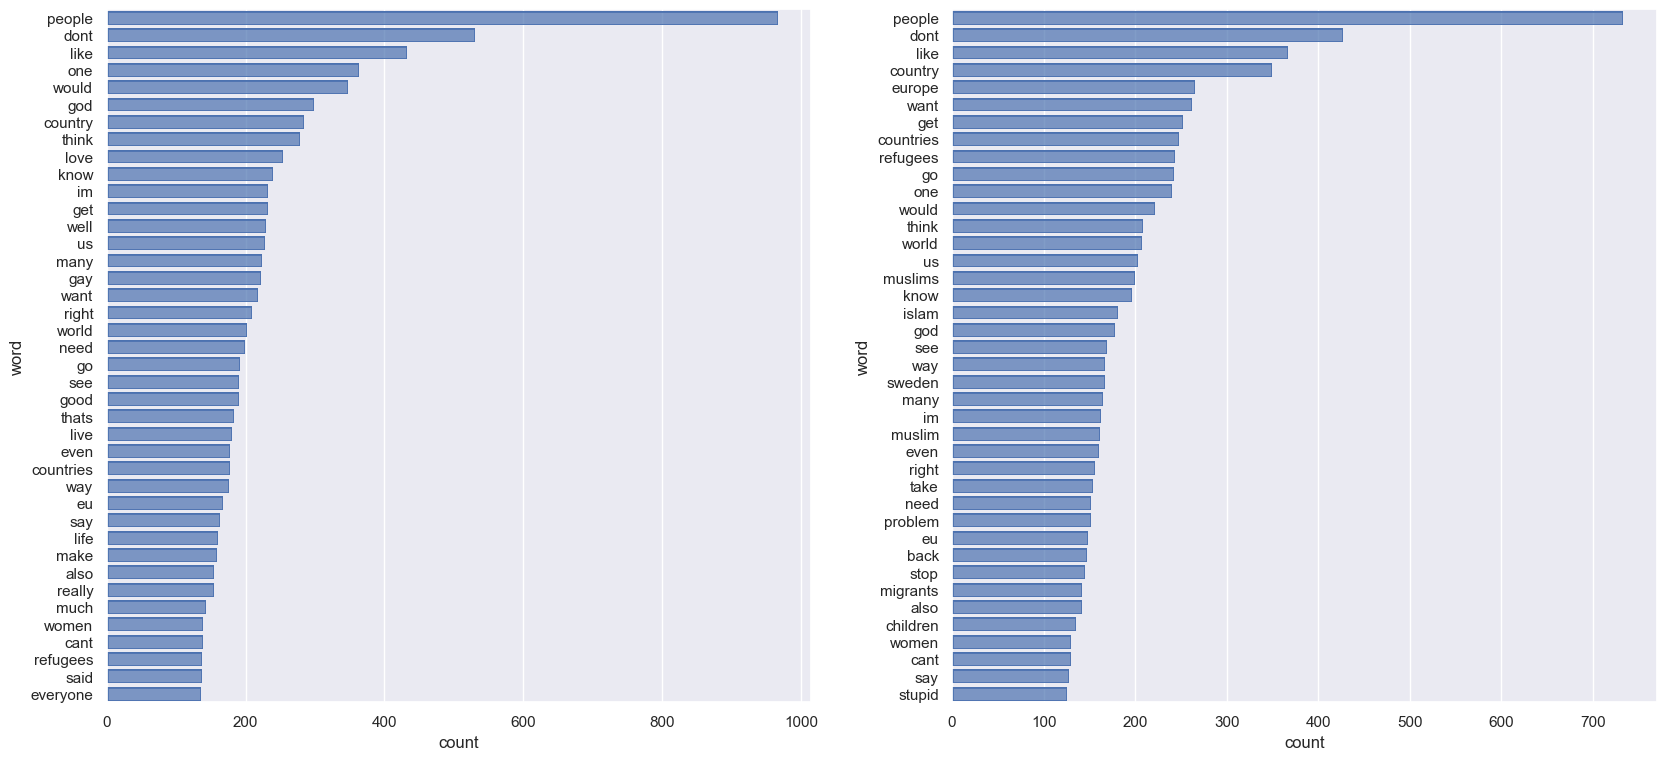

In [37]:
most_common_label_0 = FreqDist(corpus_label_0).most_common(40)
most_common_label_0_df = pd.DataFrame(most_common_label_0, columns=["word", "count"])
most_common_label_1 = FreqDist(corpus_label_1).most_common(40)
most_common_label_1_df = pd.DataFrame(most_common_label_1, columns=["word", "count"])


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))

so.Plot(most_common_label_0_df, y="word", x="count")\
    .add(so.Bar())\
    .layout(size=(16, 9))\
    .on(axs[0])\
    .plot()

so.Plot(most_common_label_1_df, y="word", x="count")\
    .add(so.Bar())\
    .layout(size=(16, 9))\
    .on(axs[1])\
    .plot()

fig.savefig("./../plots/03.png")


In [16]:
from nltk import bigrams, trigrams

df["text_bigrams"] = df["text_clean_w_stopwords"].apply(lambda text: list(bigrams(text.split())))
df["text_trigrams"] = df["text_clean_w_stopwords"].apply(lambda text: list(trigrams(text.split())))

bigrams_all = [bigram for bigram_list in df["text_bigrams"].values for bigram in bigram_list ]
trigrams_all = [trigram for trigram_list in df["text_trigrams"].values for trigram in trigram_list ]

bigram_freq_dist = FreqDist(bigrams_all)
bigram_freq_dist.most_common(10)

trigram_freq_dist = FreqDist(trigrams_all)
trigram_freq_dist.most_common(10)

[(('helpyezidikidnapped', 'helpyezidikidnapped', 'helpyezidikidnapped'), 26),
 (('god', 'loves', 'everyone'), 21),
 (('problem', 'muslims', 'living'), 18),
 (('islamic', 'terror', 'organization'), 16),
 (('acceptable', 'speech', 'target'), 13),
 (('dont', 'even', 'know'), 12),
 (('depicted', 'wearing', 'every'), 10),
 (('wearing', 'every', 'portrait'), 10),
 (('every', 'portrait', 'christians'), 10),
 (('portrait', 'christians', 'hypocrites'), 10)]

In [43]:
bigram_freq_dist_df = pd.DataFrame(bigram_freq_dist.most_common(40), columns=["word", "count"])
trigram_freq_dist_df = pd.DataFrame(trigram_freq_dist.most_common(40), columns=["word", "count"])

trigram_freq_dist_df

,word,count
0,"(helpyezidikidnapped, helpyezidikidnapped, hel...",26
1,"(god, loves, everyone)",21
2,"(problem, muslims, living)",18
3,"(islamic, terror, organization)",16
4,"(acceptable, speech, target)",13
5,"(dont, even, know)",12
6,"(depicted, wearing, every)",10
7,"(wearing, every, portrait)",10
8,"(every, portrait, christians)",10
9,"(portrait, christians, hypocrites)",10
